# About the Data

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. The dataset provides features the houses have and the price at which they were sold.
This dataset is available at Kaggle.

id - Unique ID for each home sold 

date - Date of the home sale 

price - Price of each home sold 

bedrooms - Number of bedrooms 

bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower 

sqft_living - Square footage of the apartments interior living space 

sqft_lot - Square footage of the land space 

floors - Number of floors 

waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not 

view - An index from 0 to 4 of how good the view of the property was

condition - An index from 1 to 5 on the condition of the apartment, 

grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design. 

sqft_above - The square footage of the interior housing space that is above ground level 

sqft_basement - The square footage of the interior housing space that is below ground level 

yr_built - The year the house was initially built 

yr_renovated - The year of the house’s last renovation 

zipcode - What zipcode area the house is in 

lat - Lattitude 

long - Longitude 

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors 

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors 

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import linear_model
from sklearn import neighbors

from sklearn.model_selection import train_test_split, cross_val_score

%matplotlib inline

pd.options.display.float_format = '{:.5f}'.format

In [3]:
house_data = pd.read_csv('kc_house_data.csv')
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
house_data.shape

(21613, 21)

This dataset has contain 21613 observations (rows) and 21 variables(columns.)

In [4]:
house_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
house_data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Here the date column is an object type. We need to change it to Datetime

In [4]:
house_data['date'] = pd.to_datetime(house_data['date'])

In [8]:
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Ideally the sold year should be on or after the built year. Below we will check if there are any records where there is an inconsistency. In case the built year is after the sold year we will consider it as an error and Remove those columns.

In [5]:
house_data['year_sold'] = house_data['date'].dt.year
house_data.loc[house_data.year_sold < house_data.yr_built]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold
1763,1832100030,2014-06-25,597326.0,4,4.00,3570,8250,2.0,0,0,...,2860,710,2015,0,98040,47.5784,-122.226,2230,10000,2014
2687,3076500830,2014-10-29,385195.0,1,1.00,710,6000,1.5,0,0,...,710,0,2015,0,98144,47.5756,-122.316,1440,4800,2014
7526,9520900210,2014-12-31,614285.0,5,2.75,2730,6401,2.0,0,0,...,2730,0,2015,0,98072,47.7685,-122.160,2520,6126,2014
8039,1250200495,2014-06-24,455000.0,2,1.50,1200,1259,2.0,0,0,...,1000,200,2015,0,98144,47.6001,-122.298,1320,1852,2014
14489,2770601530,2014-08-26,500000.0,2,2.25,1570,1269,2.0,0,0,...,1280,290,2015,0,98199,47.6514,-122.385,1570,6000,2014
17098,9126100346,2014-06-17,350000.0,3,2.00,1380,3600,3.0,0,0,...,1380,0,2015,0,98122,47.6074,-122.305,1480,3600,2014
19805,9126100765,2014-08-01,455000.0,3,1.75,1320,1014,3.0,0,0,...,1320,0,2015,0,98122,47.6047,-122.305,1380,1495,2014
20770,9310300160,2014-08-28,357000.0,5,2.50,2990,9240,2.0,0,0,...,2990,0,2015,0,98133,47.7384,-122.348,1970,18110,2014
20852,1257201420,2014-07-09,595000.0,4,3.25,3730,4560,2.0,0,0,...,2760,970,2015,0,98103,47.6725,-122.330,1800,4560,2014
20963,6058600220,2014-07-31,230000.0,3,1.50,1040,1264,2.0,0,0,...,900,140,2015,0,98144,47.5951,-122.301,1350,3000,2014


In [6]:
house_data = house_data.loc[house_data.year_sold >= house_data.yr_built]

In [12]:
house_data[house_data.bedrooms == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,...,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,2014


This row has 33 bedrooms with sqft living area of just 1620. Looks like a typo error. we can exclude this row.

In [7]:
house_data = house_data[house_data.bedrooms != 33]

In [14]:
house_data.shape

(21600, 22)

Let's check if we have any missing values in our dataset.

In [15]:
house_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year_sold        0
dtype: int64

We dont have any missing data in this dataset.

In our dataset, price is the outcome variable. So let's check how other variables are related to price

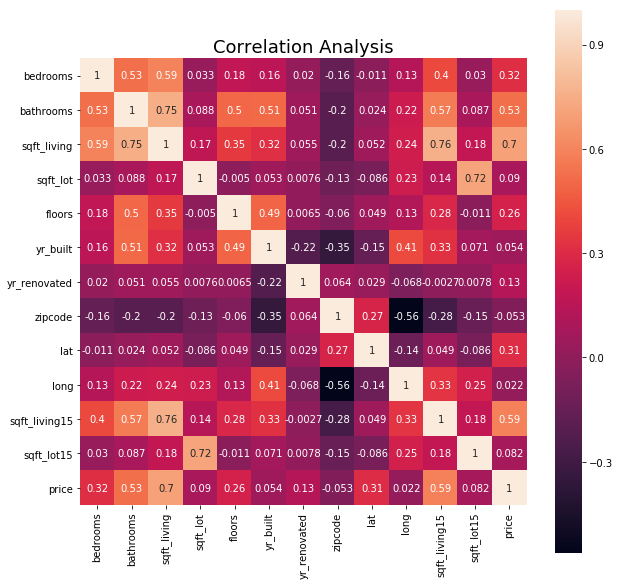

In [17]:
numerical_vars = [ 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot','floors', 'yr_built','yr_renovated','zipcode','lat','long' ,'sqft_living15','sqft_lot15', 'price']
plt.figure(figsize=(10, 10))
plt.title('Correlation Analysis', fontsize=18)
sns.heatmap( house_data[numerical_vars].corr(), annot=True , square=True)

As per the correlation matrix, 
the sqft_living variable is strongly correlated to price.
the variable bathrooms and sqft_living15 are moderately correlated to price.
the variables bedrooms and lat are weakly correlated to price.

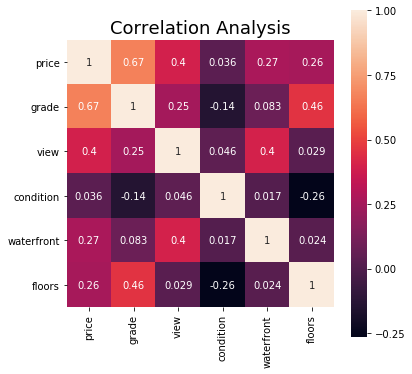

In [19]:
other_vars = ['price', 'grade', 'view','condition','waterfront','floors']
plt.figure(figsize=(6, 6))
plt.title('Correlation Analysis', fontsize=18)
sns.heatmap( house_data[other_vars].corr(), annot=True , square=True)

The grade of the house is highly correlated with the price and view of the house is moderately correlated with the price. floor and waterfront are weakly correlated with price.

# Feature engineering

Creating a data frame to hold our features. We will consider the variables which are strongly and moderately correlated to price.

In [8]:
features = house_data.loc[:,['price','sqft_living','grade','bathrooms', 'bedrooms','view']]

In [9]:
features['is_renovated'] = np.where(house_data.loc[:,'yr_renovated'] != 0 , 1, 0)

In [129]:
features.head()

,price,sqft_living,grade,bathrooms,bedrooms,view,is_renovated
0,221900.0,1180,7,1.00,3,0,0
1,538000.0,2570,7,2.25,3,0,1
2,180000.0,770,6,1.00,2,0,0
3,604000.0,1960,7,3.00,4,0,0
4,510000.0,1680,8,2.00,3,0,0


In [85]:
df_wide = features[['price','sqft_living','grade','bathrooms', 'bedrooms','is_renovated','view']]
df_long = pd.melt(df_wide, id_vars = 'price')

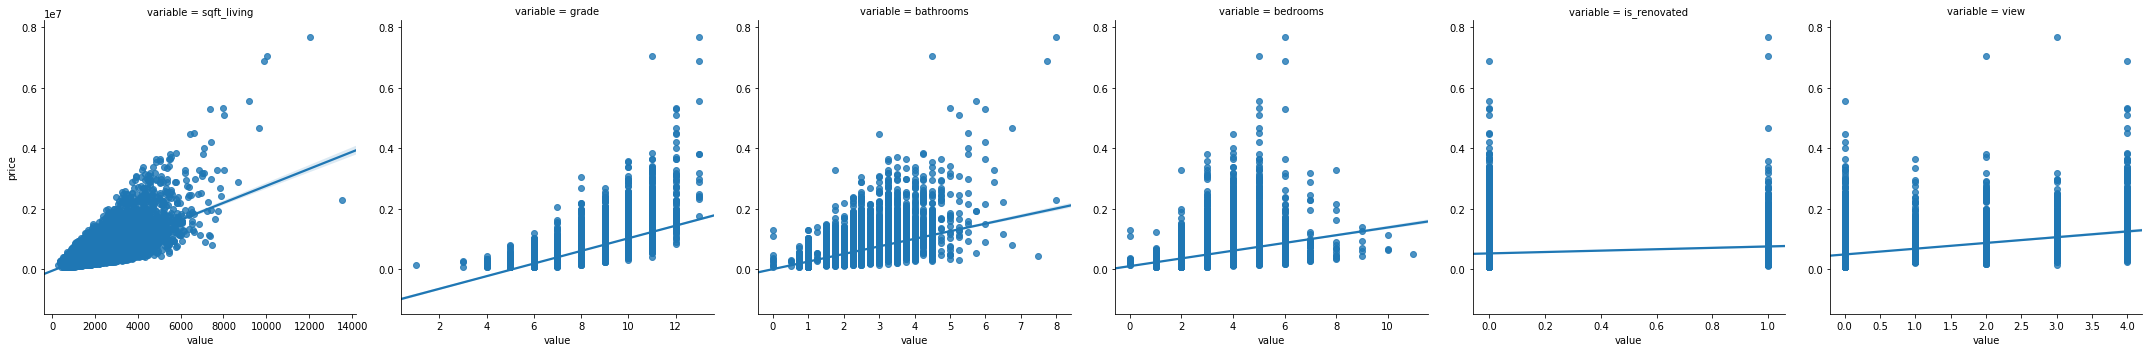

In [86]:
sns.lmplot(data = df_long,  x= 'value', y='price', col= 'variable', sharex=False )
plt.show()

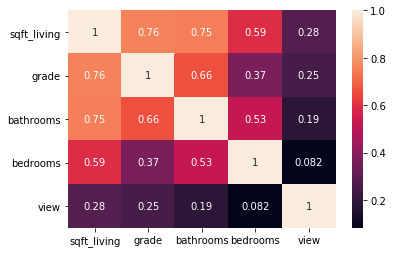


Coefficients: 
 [   202.41005466  91214.17386102 -20486.07960717 -33945.24360371
  93386.73022236]

Intercept: 
 -443420.032788

R-squared:
0.578821674847


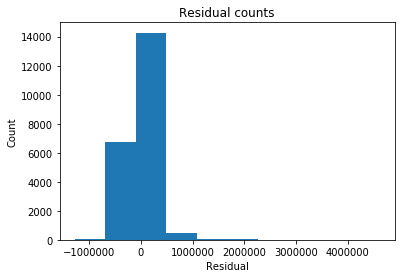

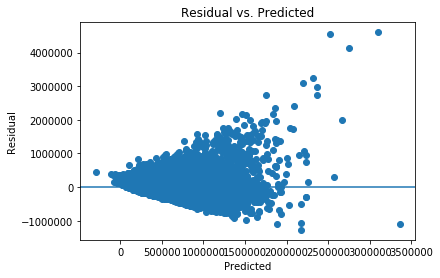

In [87]:
regr = linear_model.LinearRegression()
x = features[['sqft_living','grade','bathrooms', 'bedrooms','view']]
y = features['price']

sns.heatmap(x.corr(), annot=True)
plt.show()

regr.fit(x, y)
predicted = regr.predict(x)
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(x, y))


predicted = regr.predict(x).ravel()
actual = y
# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()


plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Let's check the distribution of price

In [12]:
norm = np.random.normal(0, 1,len(features))
norm.sort()


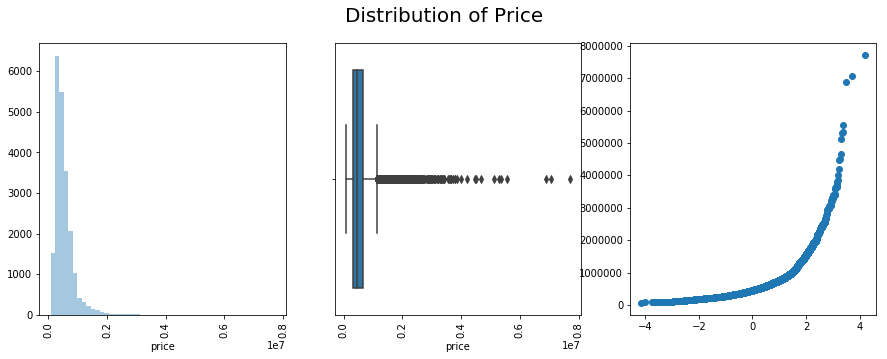

In [88]:

plt.figure(figsize=(15,5))
plt.suptitle('Distribution of Price', fontsize=20)
plt.subplot(1,3,1)
sns.distplot( features['price'], kde= False)
plt.xticks(rotation=90)
plt.subplot(1,3,2)
sns.boxplot(features['price'])
plt.xticks(rotation=90)
plt.subplot(1,3,3)
price = sorted(features['price'])
plt.plot(norm, price,"o") 

plt.show()

The price deviates from the normal distribution. So normalise the price by taking a log transformation of this. 

In [10]:
features['log_tr_price'] = np.log(features['price'])

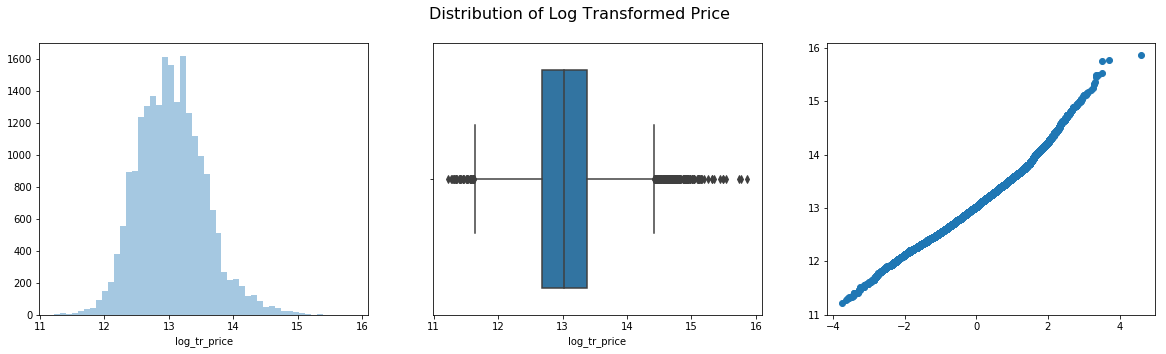

In [13]:

plt.figure(figsize=(20,5))
plt.suptitle('Distribution of Log Transformed Price', fontsize=16)
plt.subplot(1,3,1)
sns.distplot(features['log_tr_price'], kde= False)
plt.subplot(1,3,2)
sns.boxplot(features['log_tr_price'])
plt.subplot(1,3,3)
plt.plot(norm, sorted(features['log_tr_price']),"o") 

plt.show()

After taking the log transformation, the price now follows a normal distribution.

Lets analyse the distribution of sqft_living

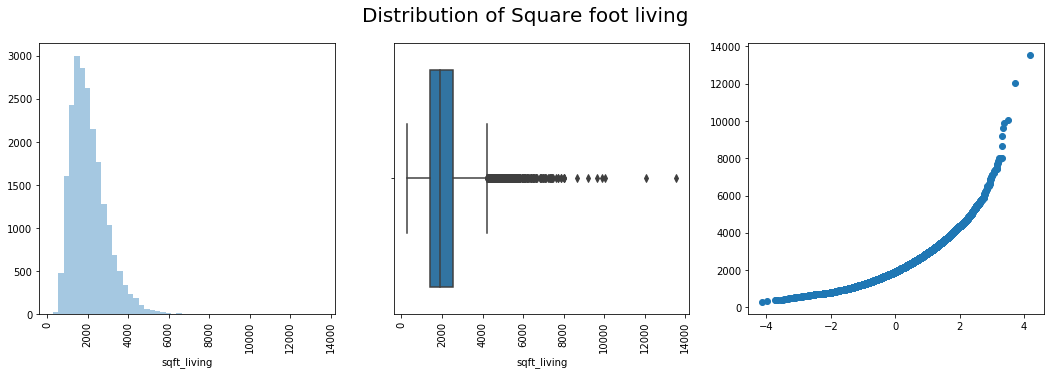

In [90]:
plt.figure(figsize=(18,5))
plt.suptitle('Distribution of Square foot living', fontsize=20)
plt.subplot(1,3,1)
sns.distplot( features['sqft_living'], kde= False)
plt.xticks(rotation=90)
plt.subplot(1,3,2)
sns.boxplot(features['sqft_living'])
plt.xticks(rotation=90)
plt.subplot(1,3,3)
price = sorted(features['sqft_living'])
plt.plot(norm, price,"o") 

plt.show()


The Square foot living does not follow a normal distribution. So we will normalise the sqft_living by taking a log transformation of this. Then we will analyse its relation with log transfomed price.

In [29]:
features['log_tr_sqft_living'] = np.log(features['sqft_living'])
features['log_tr_sqft_living15'] = np.log(house_data['sqft_living15'])

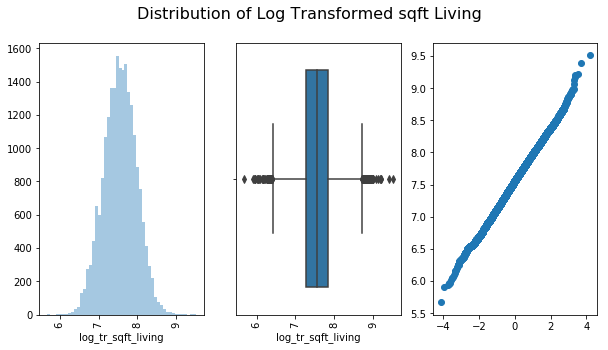

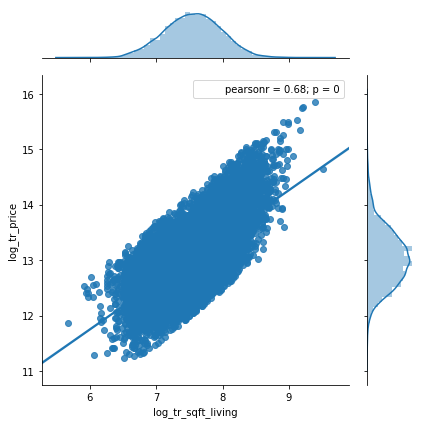

In [91]:

plt.figure(figsize=(10,5))
plt.suptitle('Distribution of Log Transformed sqft Living', fontsize=16)
plt.subplot(1,3,1)
sns.distplot( features['log_tr_sqft_living'], kde= False)
plt.xticks(rotation=90)

plt.subplot(1,3,2)
sns.boxplot(features['log_tr_sqft_living'])
plt.xticks(rotation=90)

plt.subplot(1,3,3)
sqft_living = sorted(features['log_tr_sqft_living'])
plt.plot(norm, sqft_living,"o") 

sns.jointplot(x="log_tr_sqft_living", y="log_tr_price", data=features, kind = 'reg')
plt.tight_layout()
plt.show()


In [15]:
features['bed_bath_room'] = features['bathrooms'] * features['bedrooms']

In [16]:
features.describe()

,price,sqft_living,grade,bathrooms,bedrooms,view,is_renovated,log_tr_price,log_tr_sqft_living,bed_bath_room
count,2.160000e+04,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000
mean,5.401249e+05,2079.856620,7.656435,2.114606,3.369537,0.234352,0.042315,13.047819,7.550347,7.495093
std,3.672231e+05,918.280857,1.175380,0.770083,0.907713,0.766434,0.201311,0.526798,0.424729,4.213141
min,7.500000e+04,290.000000,1.000000,0.000000,0.000000,0.000000,0.000000,11.225243,5.669881,0.000000
25%,3.215000e+05,1430.000000,7.000000,1.750000,3.000000,0.000000,0.000000,12.680753,7.265430,4.500000
50%,4.500000e+05,1910.000000,7.000000,2.250000,3.000000,0.000000,0.000000,13.017003,7.554859,7.000000
75%,6.450000e+05,2550.000000,8.000000,2.500000,4.000000,0.000000,0.000000,13.377006,7.843849,10.000000
max,7.700000e+06,13540.000000,13.000000,8.000000,11.000000,4.000000,1.000000,15.856731,9.513404,67.500000


In [20]:
grade = sorted(features.grade.unique())
print(grade)

[1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


In [30]:
grade_dummies = pd.get_dummies(features.grade, prefix='grade')
features_2 = pd.concat([features,grade_dummies], axis=1)


In [31]:
view_dummies = pd.get_dummies(features.view, prefix='view')
features_2 = pd.concat([features_2,view_dummies], axis=1)

In [32]:
zip = house_data.zipcode.value_counts().head(20).index.tolist()
print(zip)


[98103, 98038, 98115, 98052, 98117, 98042, 98034, 98118, 98023, 98006, 98133, 98059, 98058, 98155, 98074, 98033, 98027, 98125, 98056, 98053]


In [33]:

zip_dummies = pd.get_dummies(house_data.zipcode, prefix='zip')
features_2 = pd.concat([features_2,zip_dummies], axis=1)

In [34]:
features_2.columns

Index(['price', 'sqft_living', 'grade', 'bathrooms', 'bedrooms', 'view',
       'is_renovated', 'log_tr_price', 'log_tr_sqft_living', 'bed_bath_room',
       'log_tr_sqft_living15', 'grade_1', 'grade_3', 'grade_4', 'grade_5',
       'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11',
       'grade_12', 'grade_13', 'view_0', 'view_1', 'view_2', 'view_3',
       'view_4', 'zip_98001', 'zip_98002', 'zip_98003', 'zip_98004',
       'zip_98005', 'zip_98006', 'zip_98007', 'zip_98008', 'zip_98010',
       'zip_98011', 'zip_98014', 'zip_98019', 'zip_98022', 'zip_98023',
       'zip_98024', 'zip_98027', 'zip_98028', 'zip_98029', 'zip_98030',
       'zip_98031', 'zip_98032', 'zip_98033', 'zip_98034', 'zip_98038',
       'zip_98039', 'zip_98040', 'zip_98042', 'zip_98045', 'zip_98052',
       'zip_98053', 'zip_98055', 'zip_98056', 'zip_98058', 'zip_98059',
       'zip_98065', 'zip_98070', 'zip_98072', 'zip_98074', 'zip_98075',
       'zip_98077', 'zip_98092', 'zip_98102', 'zip_9810

In [26]:
features_2[['zip_98038', 'zip_98052', 'zip_98103', 'zip_98115', 'zip_98117']].head()

,zip_98038,zip_98052,zip_98103,zip_98115,zip_98117
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


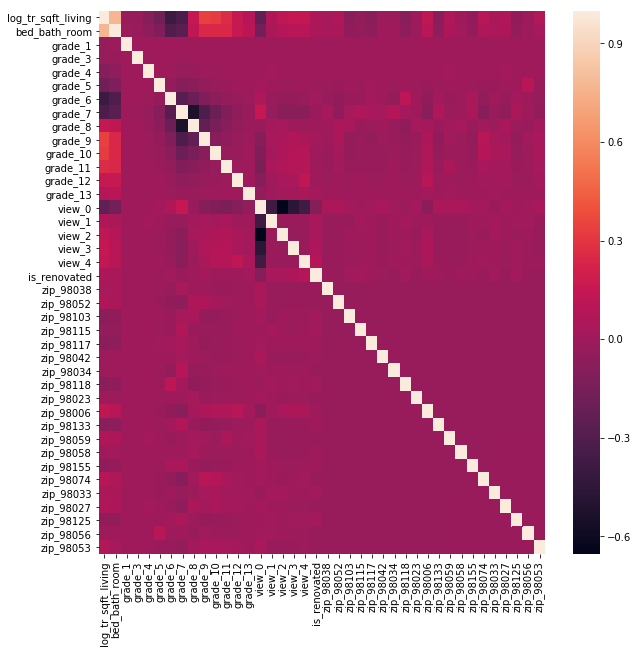


Coefficients: 
 [  4.36672052e-01   5.93984921e-04  -4.46162548e-01  -5.41311815e-01
  -4.55546233e-01  -5.05465090e-01  -3.84376669e-01  -2.56995463e-01
  -8.44643227e-02   1.20260979e-01   3.11715536e-01   5.09441871e-01
   6.86192576e-01   1.04671118e+00  -2.11722748e-01   1.17421832e-02
  -5.50565041e-02  -3.99181009e-03   2.59028879e-01   1.72161392e-01
  -2.67076855e-01   1.56042346e-01   3.37748276e-01   3.47378187e-01
   3.41381335e-01  -3.58669604e-01   9.11718691e-02   9.82342298e-03
  -4.81808111e-01   1.33444732e-01   1.88729224e-02  -1.04480083e-01
  -2.76706064e-01  -6.72035262e-04   4.19424894e-02   3.03372021e-01
   4.35756455e-02   1.12183395e-01  -1.10080024e-01   1.31675978e-01]

Intercept: 
 10.0455890982

R-squared:
0.67238951365


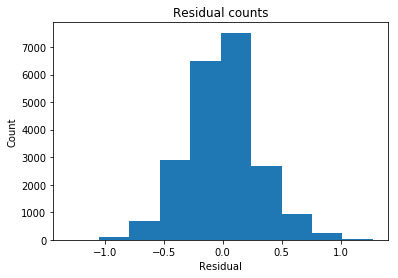

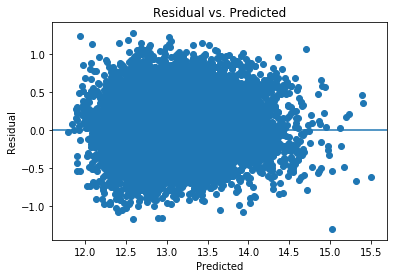

In [36]:
regr = linear_model.LinearRegression()
x = features_2[['log_tr_sqft_living','bed_bath_room', 'grade_1', 'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7',
       'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13', 'view_0', 'view_1', 'view_2', 'view_3',
                'view_4', 'is_renovated', 'zip_98038',
       'zip_98052', 'zip_98103', 'zip_98115', 'zip_98117'
, 'zip_98042', 'zip_98034', 'zip_98118', 'zip_98023', 'zip_98006'               
, 'zip_98133', 'zip_98059', 'zip_98058', 'zip_98155', 'zip_98074', 
                'zip_98033', 'zip_98027', 'zip_98125', 'zip_98056', 'zip_98053'
                
                ]]
# Adding few more zip codes increased the R2 value little
y = features_2['log_tr_price']
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(x.corr()) #, annot=True)
plt.show()

regr.fit(x, y)
predicted = regr.predict(x)
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(x, y))


predicted = regr.predict(x).ravel()
actual = y
# Calculate the error, also called the residual.
residual = actual - predicted


plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()


plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [47]:
features_2['bed_bath_room_z'] = (features_2.bed_bath_room - features_2.bed_bath_room.min()) / (features_2.bed_bath_room.max() - features_2.bed_bath_room.min())

In [49]:
from sklearn.model_selection import train_test_split

x = features_2[['log_tr_sqft_living','bed_bath_room_z', 'grade_1', 'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7',
       'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13', 'view_0', 'view_1', 'view_2', 'view_3',
                'view_4', 'is_renovated', 'zip_98038',
       'zip_98052', 'zip_98103', 'zip_98115', 'zip_98117'
, 'zip_98042', 'zip_98034', 'zip_98118', 'zip_98023', 'zip_98006'               
, 'zip_98133', 'zip_98059', 'zip_98058', 'zip_98155', 'zip_98074', 
                'zip_98033', 'zip_98027', 'zip_98125', 'zip_98056', 'zip_98053'
                
                ]]
# Adding few more zip codes increased the R2 value little
y = features_2['log_tr_price']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=20)

In [57]:
lm = linear_model.LinearRegression()
lm.fit(x_train, y_train)

# Get score for training data
print('With 30% holdout Regression score - training data:', lm.score(x_train, y_train))

# Get score for test data
print('With 30% holdout Regression score - test data:', lm.score(x_test, y_test))

With 30% holdout Regression score - training data: 0.671931582525
With 30% holdout Regression score - test data: 0.672480174862


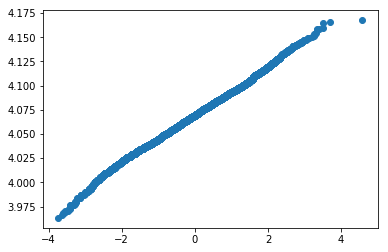

In [62]:
from scipy.stats import boxcox
bc = boxcox(features_2['price'])

features_2['price_BC'] = bc[0]
price_BC = sorted(features_2['price_BC'])
plt.plot(norm, price_BC,"o") 
plt.show()

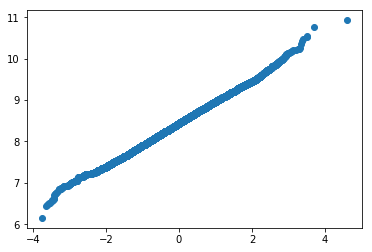

In [63]:
from scipy.stats import boxcox
bc = boxcox(features_2['sqft_living'])

features_2['sqft_living_BC'] = bc[0]
sqft_living_BC = sorted(features_2['sqft_living_BC'])
plt.plot(norm, sqft_living_BC,"o") 
plt.show()

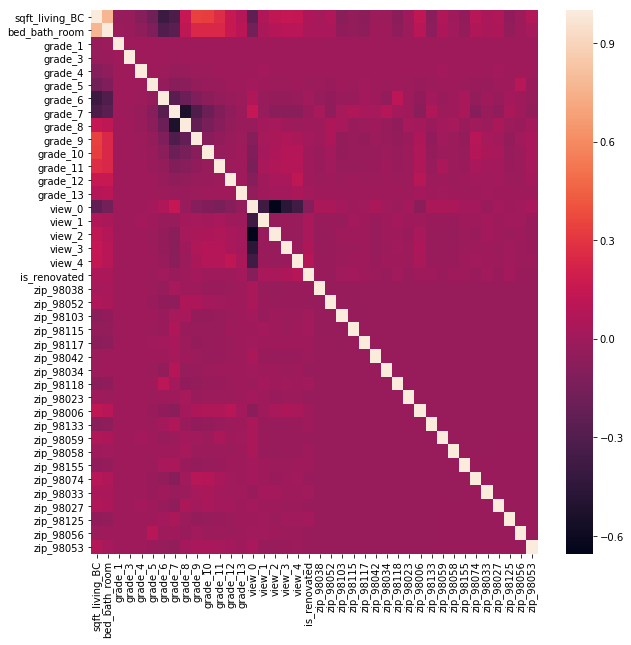


Coefficients: 
 [  1.71453376e-02  -4.20124106e-05  -2.36877621e-02  -2.76840473e-02
  -2.14079798e-02  -2.21957561e-02  -1.44882291e-02  -7.19680565e-03
   1.27896183e-03   9.97005326e-03   1.70909360e-02   2.35199227e-02
   2.77347625e-02   3.70659437e-02  -8.94642960e-03   1.00240277e-03
  -1.84223898e-03  -1.48263179e-04   9.93452899e-03   7.46868740e-03
  -1.22215278e-02   8.06144283e-03   1.65429485e-02   1.69593115e-02
   1.69905291e-02  -1.72324524e-02   5.14926306e-03   1.02649083e-03
  -2.34989425e-02   6.72295412e-03   1.62409795e-03  -3.98600943e-03
  -1.27894339e-02   7.16113624e-04   3.00334197e-03   1.43684954e-02
   2.97508659e-03   6.19570958e-03  -4.54904265e-03   6.77930537e-03]

Intercept: 
 3.93322441868

R-squared:
0.656253033683


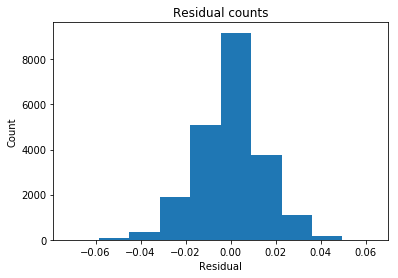

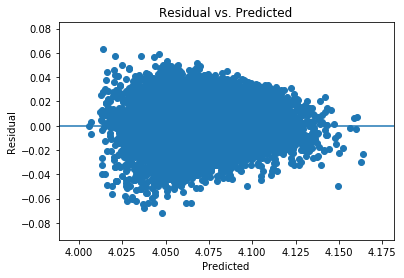

In [64]:
regr = linear_model.LinearRegression()
x = features_2[['sqft_living_BC','bed_bath_room', 'grade_1', 'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7',
       'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13', 'view_0', 'view_1', 'view_2', 'view_3',
                'view_4', 'is_renovated', 'zip_98038',
       'zip_98052', 'zip_98103', 'zip_98115', 'zip_98117'
, 'zip_98042', 'zip_98034', 'zip_98118', 'zip_98023', 'zip_98006'               
, 'zip_98133', 'zip_98059', 'zip_98058', 'zip_98155', 'zip_98074', 
                'zip_98033', 'zip_98027', 'zip_98125', 'zip_98056', 'zip_98053'
                
                ]]
# Adding few more zip codes increased the R2 value little
y = features_2['price_BC']
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(x.corr()) #, annot=True)
plt.show()

regr.fit(x, y)
predicted = regr.predict(x)
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(x, y))


predicted = regr.predict(x).ravel()
actual = y
# Calculate the error, also called the residual.
residual = actual - predicted


plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()


plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [65]:
ten_fold = cross_val_score(lm, x, y, cv=10)
print(ten_fold)
print("The Average Accuracy : " , ten_fold.mean())
print("Standard Deviation : " , ten_fold.std())

[ 0.66026084  0.64091404  0.64070537  0.64662083  0.62504472  0.65329886
  0.65012251  0.66577906  0.65986705  0.68018079]
The Average Accuracy :  0.652279407278
Standard Deviation :  0.0145759130484


In [56]:
# Examine model parameters in greater depth using StatsModels

# Import model
import statsmodels.formula.api as smf

# Join x_train & y_train into one variable
data = x_train.join(y_train)

#specify interactions 
linear_formula = 'log_tr_price ~ log_tr_sqft_living + bed_bath_room_z + grade_1 + grade_3+grade_4+grade_5+grade_6+grade_7+grade_8+ grade_9+ grade_10+ grade_11+ grade_12+ grade_13+view_0+ view_1+ view_2+ view_3+ view_4+ is_renovated+ zip_98038+ zip_98052+ zip_98103+ zip_98115+ zip_98117+ zip_98042+ zip_98034+ zip_98118+ zip_98023+ zip_98006 + zip_98133+ zip_98059+ zip_98058+ zip_98155+ zip_98074+ zip_98033+ zip_98027+ zip_98125+ zip_98056+ zip_98053'

# run validation
lm = smf.ols(formula=linear_formula, data=data).fit()

print('coefficients: \n')
print(lm.params)
print()
print('P-Values: \n')
print(lm.pvalues)
print()
print('R2 Value: \n')
print(lm.rsquared)

coefficients: 

Intercept             7.87808
log_tr_sqft_living    0.43321
bed_bath_room_z       0.03364
grade_1               0.16372
grade_3               0.52530
grade_4               0.17316
grade_5               0.12207
grade_6               0.23772
grade_7               0.35943
grade_8               0.53360
grade_9               0.74044
grade_10              0.93060
grade_11              1.12559
grade_12              1.28090
grade_13              1.68554
view_0                1.36554
view_1                1.59001
view_2                1.53269
view_3                1.56596
view_4                1.82388
is_renovated          0.17875
zip_98038            -0.27052
zip_98052             0.15470
zip_98103             0.32555
zip_98115             0.34937
zip_98117             0.34220
zip_98042            -0.35525
zip_98034             0.08488
zip_98118             0.01628
zip_98023            -0.48614
zip_98006             0.12826
zip_98133             0.01214
zip_98059            -0.

Looking at the p value:
    bed_bath_room_z and grade_1 have p value > 0.05. so can remove them.
    
    zip_98155, zip_98118

# How to include all columns like dummies of view and zip ? the formula becomes so long...

# How to remove the colinearity between bed-bath and sqft living ???

# How to go ahead with PLSR ?
# PLSR will not work as well if features are uncorrelated, or if the only feature correlations are paired

# KNN Regression

In [70]:
features_2.describe()

,price,sqft_living,grade,bathrooms,bedrooms,view,is_renovated,log_tr_price,log_tr_sqft_living,bed_bath_room,...,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,bed_bath_room_z,price_BC,sqft_living_BC
count,21600.00000,21600.00000,21600.00000,21600.00000,21600.00000,21600.00000,21600.00000,21600.00000,21600.00000,21600.00000,...,21600.00000,21600.00000,21600.00000,21600.00000,21600.00000,21600.00000,21600.00000,21600.00000,21600.00000,21600.00000
mean,540124.87046,2079.85662,7.65644,2.11461,3.36954,0.23435,0.04231,13.04782,7.55035,7.49509,...,0.01176,0.01245,0.01181,0.01213,0.00630,0.01296,0.01463,0.11104,4.06893,8.42671
std,367223.12900,918.28086,1.17538,0.77008,0.90771,0.76643,0.20131,0.52680,0.42473,4.21314,...,0.10780,0.11090,0.10801,0.10947,0.07910,0.11312,0.12007,0.06242,0.02452,0.52656
min,75000.00000,290.00000,1.00000,0.00000,0.00000,0.00000,0.00000,11.22524,5.66988,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,3.96325,6.15329
25%,321500.00000,1430.00000,7.00000,1.75000,3.00000,0.00000,0.00000,12.68075,7.26543,4.50000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.06667,4.05236,8.07169
50%,450000.00000,1910.00000,7.00000,2.25000,3.00000,0.00000,0.00000,13.01700,7.55486,7.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.10370,4.06898,8.42912
75%,645000.00000,2550.00000,8.00000,2.50000,4.00000,0.00000,0.00000,13.37701,7.84385,10.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.14815,4.08538,8.78896
max,7700000.00000,13540.00000,13.00000,8.00000,11.00000,4.00000,1.00000,15.85673,9.51340,67.50000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,4.16750,10.92681


In [68]:
x = features_2[['sqft_living_BC','bed_bath_room', 'grade_1', 'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7',
       'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13', 'view_0', 'view_1', 'view_2', 'view_3',
                'view_4', 'is_renovated', 'zip_98038',
       'zip_98052', 'zip_98103', 'zip_98115', 'zip_98117'
, 'zip_98042', 'zip_98034', 'zip_98118', 'zip_98023', 'zip_98006'               
, 'zip_98133', 'zip_98059', 'zip_98058', 'zip_98155', 'zip_98074', 
                'zip_98033', 'zip_98027', 'zip_98125', 'zip_98056', 'zip_98053'
                
                ]]
# Adding few more zip codes increased the R2 value little
y = features_2['price_BC']


In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=20)
print('5 neighbors with 30% holdout : \n')
knn_5w = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')
knn_5w.fit(x_train, y_train)

print('Train Data score :', knn_5w.score(x_train, y_train))
print('Test Data Score :', knn_5w.score(x_test, y_test))

5 neighbors with 30% holdout : 

Train Data score : 0.901012725915
Test Data Score : 0.539060120393


In [91]:
print('5 neighbors with Cross Validation:')
knn_5 = neighbors.KNeighborsRegressor(n_neighbors=5)
knn_5_w = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')

score = cross_val_score(knn_5, x, y, cv=10)
print('\n The Unweighted Accuracy scores are :\n ' , score)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_5_w, x, y, cv=10)
print('\n The weighted Accuracy scores are :\n ' , score_w)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

5 neighbors with Cross Validation:

 The Unweighted Accuracy scores are :
  [ 0.60659908  0.57910385  0.57840383  0.591839    0.57623428  0.59534292
  0.5988745   0.61517091  0.60295134  0.6251713 ]
Unweighted Accuracy: 0.60 (+/- 0.03)

 The weighted Accuracy scores are :
  [ 0.54965985  0.53992912  0.52066062  0.53366857  0.52191534  0.54017367
  0.54198128  0.56817992  0.54809303  0.57507935]
Weighted Accuracy: 0.54 (+/- 0.03)


In [89]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=20)
print('10 neighbors with 30% holdout : \n')
knn_10w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
knn_10w.fit(x_train, y_train)

print('Train Data score :', knn_10w.score(x_train, y_train))
print('Test Data Score :', knn_10w.score(x_test, y_test))

10 neighbors with 30% holdout : 

Train Data score : 0.904087008075
Test Data Score : 0.55496684413


In [88]:
print('10 neighbors with Cross Validation: \n')
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
score = cross_val_score(knn, x, y, cv=10)
print('The Unweighted Accuracy scores are : \n' , score)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_10w, x, y, cv=10)
print('\n The weighted Accuracy scores are : \n' , score_w)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

10 neighbors with Cross Validation: 

The Unweighted Accuracy scores are : 
 [ 0.63564093  0.60913845  0.60590604  0.61219632  0.5850255   0.62576151
  0.61443963  0.63668716  0.62477613  0.64042321]
Unweighted Accuracy: 0.62 (+/- 0.03)

 The weighted Accuracy scores are : 
 [ 0.57053362  0.55495353  0.53649003  0.5450013   0.53126348  0.56055788
  0.55907828  0.58679119  0.56095205  0.59258865]
Weighted Accuracy: 0.56 (+/- 0.04)
